# Deep Learning (Artificial Neural Network)
### Multiclass Classification
- But here example is of Binary classification (Solved as per Multiclass classification - just for understanding)
- Predict Target column belongs to which category

In [27]:
#Lets import the libraries -
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
#Lets load the dataset -
df2 = pd.read_csv('C:/Users/om/Desktop/Classified Data',index_col=0)

In [29]:
df2.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [30]:
#Lets split the data in x & y axis veriables -
x2=df2.iloc[:,:10]
y2=df2.iloc[:,10]

In [31]:
#Lets split the data in train_test_split parts -
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x2,y2,test_size=0.30,random_state=0)

In [32]:
#Lets apply the StandardScaler for better scalng -
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train.shape)
print(y_train.shape)

(700, 10)
(700,)


In [33]:
#Lets create an object for the algorithm and create Neural Network -
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import ReLU,PReLU
from keras.layers import Dropout
classifier2=Sequential()

In [34]:
#Lets Add Input Layer -
classifier2.add(Dense(units=18,kernel_initializer='uniform',activation='ReLU'))

In [35]:
#Lets Add First Hidden Layer -
classifier2.add(Dense(units=10,kernel_initializer='uniform',activation='ReLU'))

In [36]:
#Lets Add Second Hidden layer -
classifier2.add(Dense(units=5,kernel_initializer='uniform',activation='ReLU'))

In [37]:
#Lets Add Third Hidden layer -
classifier2.add(Dense(units=2,kernel_initializer='uniform',activation='ReLU'))

In [38]:
#Lets Add Output layer -
classifier2.add(Dense(units=1,kernel_initializer='uniform',activation='softmax'))

In [39]:
#Lets Compile all the layers -
classifier2.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

In [40]:
#Lets apply early stopping to automatically stop the epoches when our accuracy stop improving -
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.0001,patience=5,verbose=1,mode='auto',baseline=None,restore_best_weights=False)

In [41]:
#Lets fit the model and apply the epochs -
model_history2 = classifier2.fit(X_train,y_train,batch_size=10,epochs=100,validation_split=0.33,callbacks = early_stopping)

Epoch 1/100
47/47 [==============================] - 1s 7ms/step - loss: 0.0000e+00 - accuracy: 0.4658 - val_loss: 0.0000e+00 - val_accuracy: 0.5259
Epoch 2/100
47/47 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.4658 - val_loss: 0.0000e+00 - val_accuracy: 0.5259
Epoch 3/100
47/47 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.4658 - val_loss: 0.0000e+00 - val_accuracy: 0.5259
Epoch 4/100
47/47 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.4658 - val_loss: 0.0000e+00 - val_accuracy: 0.5259
Epoch 5/100
47/47 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.4658 - val_loss: 0.0000e+00 - val_accuracy: 0.5259
Epoch 6/100
47/47 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.4658 - val_loss: 0.0000e+00 - val_accuracy: 0.5259
Epoch 6: early stopping


In [42]:
#Lets Predict the Results -
predict_mann = classifier2.predict(X_test)
predict_mann = predict_mann > 0.5

10/10 [==============================] - 0s 4ms/step


In [43]:
#Lets Evaluate the results -
from sklearn.metrics import accuracy_score,confusion_matrix
print(confusion_matrix(y_test,predict_mann))
print(accuracy_score(y_test,predict_mann))

[[  0 140]
 [  0 160]]
0.5333333333333333


In [44]:
#Lets Visualize the results -
model_history2.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

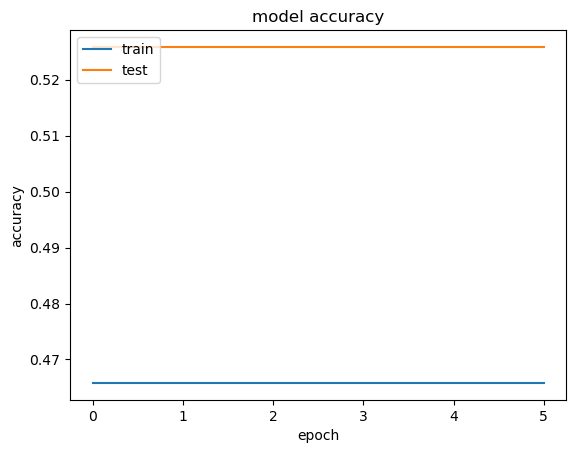

In [45]:
#Lets Summarize history for accuracy -
plt.plot(model_history2.history['accuracy'])
plt.plot(model_history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

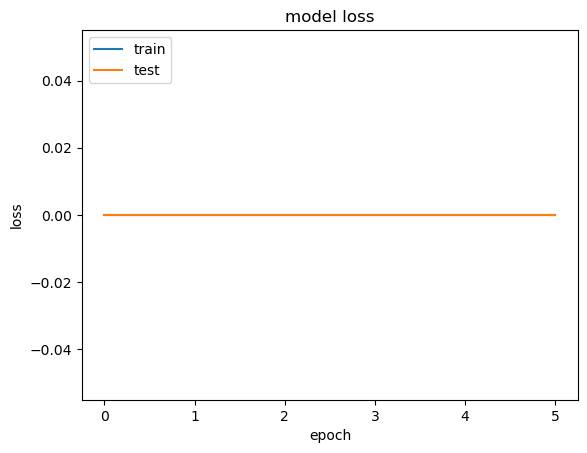

In [46]:
#Lets summarize history for loss -
plt.plot(model_history2.history['loss'])
plt.plot(model_history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# Thank You...